In [2]:
## Data Collection
import nltk
nltk.download('gutenberg')
from nltk.corpus import  gutenberg
import pandas as pd

## load the dataset
data=gutenberg.raw('shakespeare-hamlet.txt')

## save to a file
with open('hamlet.txt','w') as file:
    file.write(data)


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


## 1️⃣ Data Collection

In [3]:
## Data Preprocessing
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

##laod the dataset
with open('hamlet.txt','r') as file:
    text=file.read().lower()
    
## Tokenize the text-creating indexes for words
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
total_words=len(tokenizer.word_index)+1
total_words


4818

## 2️⃣ Data Preprocessing & Sequence Creation

In [4]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [6]:
## create input sequences
input_sequence=[]

for line in text.split('\n') :
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]
        input_sequence.append(n_gram_sequence)
        
    

In [7]:
input_sequence

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [8]:
## Pad Sequences
max_sequence_len=max([len(x) for x in input_sequence])
max_sequence_len

14

In [9]:
input_sequence=np.array(pad_sequences(input_sequence,padding='pre',maxlen=max_sequence_len))
input_sequence

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]])

In [10]:
##create predicitors and label
x,y=input_sequence[:,:-1],input_sequence[:,-1]  

In [11]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]])

In [12]:
y

array([ 687,    4,   45, ..., 1047,    4,  193])

In [13]:
import tensorflow as tf
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
# Split the data - WITH PROPER SHUFFLING
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)


## 3️⃣ Model Building & Training

In [15]:
## BUILD SIMPLE LSTM MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

# Build model
model = Sequential()
model.add(Embedding(total_words, 150, input_length=max_sequence_len-1))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(total_words, activation="softmax"))

# Compile with default Adam (lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 150)           722700    
                                                                 
 lstm (LSTM)                 (None, 13, 256)           416768    
                                                                 
 dropout (Dropout)           (None, 13, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 4818)              621522    
                                                                 
Total params: 1,958,110
Trainable params: 1,958,110
Non-

In [16]:
# Only TensorBoard callback - NO EARLY STOPPING!
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    x_train, y_train,
    epochs=50,  # Fixed 50 epochs - NO callbacks to stop it!
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[tensorboard_callback]  # Only TensorBoard!
)


Epoch 1/50
322/322 [==============================] - 49s 141ms/step - loss: 6.9595 - accuracy: 0.0308 - val_loss: 6.7466 - val_accuracy: 0.0336
Epoch 2/50
322/322 [==============================] - 45s 140ms/step - loss: 6.5834 - accuracy: 0.0343 - val_loss: 6.6866 - val_accuracy: 0.0336
Epoch 3/50
322/322 [==============================] - 47s 146ms/step - loss: 6.4655 - accuracy: 0.0380 - val_loss: 6.7393 - val_accuracy: 0.0418
Epoch 4/50
322/322 [==============================] - 48s 150ms/step - loss: 6.3721 - accuracy: 0.0438 - val_loss: 6.7589 - val_accuracy: 0.0435
Epoch 5/50
322/322 [==============================] - 42s 132ms/step - loss: 6.2659 - accuracy: 0.0493 - val_loss: 6.7741 - val_accuracy: 0.0493
Epoch 6/50
322/322 [==============================] - 40s 125ms/step - loss: 6.1469 - accuracy: 0.0527 - val_loss: 6.7723 - val_accuracy: 0.0495
Epoch 7/50
322/322 [==============================] - 46s 143ms/step - loss: 6.0117 - accuracy: 0.0616 - val_loss: 6.7868 - val_ac

## 4️⃣ Save Model & Tokenizer

In [17]:
import pickle

model.save('Bards-Brain.h5')

# Save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [18]:
model.input_shape[1]

13

In [19]:
# Function to predict the next word
def predict_next_word(model,tokenizer,text,max_sequence_len):
    # Convert to lowercase to match training data
    text = text.lower()
    
    token_list=tokenizer.texts_to_sequences([text])[0]
    
    if len(token_list) >= max_sequence_len :
        token_list=token_list[-(max_sequence_len-1):]# Ensure the sequence length matches max_sequence_len-1
    
    token_list=pad_sequences([token_list],padding='pre',maxlen=max_sequence_len-1)
    
    predicted=model.predict(token_list,verbose=0)
    
    predicted_word_index=np.argmax(predicted,axis=1)
    
    for word,index in tokenizer.word_index.items() :
        if index==predicted_word_index[0] :
            return word
    
    return None

## 5️⃣ Test Predictions

In [20]:
input_text="To be or not to be"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:To be or not to be
Next Word PRediction:attendants


In [21]:
input_text="  Barn. Last night of all,When yond same"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:  Barn. Last night of all,When yond same
Next Word PRediction:starre


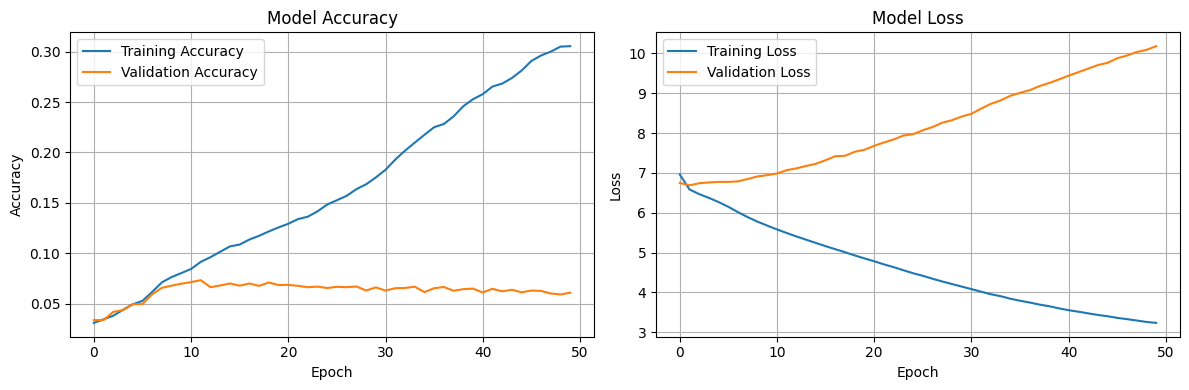


Final Training Accuracy: 0.3055
Final Validation Accuracy: 0.0608
Final Training Loss: 3.2345
Final Validation Loss: 10.1793


In [22]:
## Check training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

In [23]:
%load_ext tensorboard

In [24]:
%tensorboard --logdir logs/fit

In [4]:
import os
os.chdir(r"C:\Users\Hp\Desktop\Python Projects\Bards_Brain")


In [ ]:
model = tf.keras.models.load_model("Bards-Brain.h5")
model.summary()


2.10.1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 150)           722700    
                                                                 
 lstm (LSTM)                 (None, 13, 256)           416768    
                                                                 
 dropout (Dropout)           (None, 13, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 4818)              621522    
                                                                 
Total params: 1,958,110
Trainable params: 1,958,1